In [1]:
import cv2
import os

In [2]:
def preprocess_image(image_path):
    # Read the image
    image = cv2.imread(image_path)
    
    # Resize the image to 28x28
    resized_image = cv2.resize(image, (28, 28))
    
    # Convert the image to grayscale
    grayscale_image = cv2.cvtColor(resized_image, cv2.COLOR_BGR2GRAY)
    
    # Expand dimensions to add a channel dimension (for compatibility with CNN input)
    grayscale_image = grayscale_image.reshape((28, 28, 1))
    
    return grayscale_image


# Function to preprocess all images in a directory
def preprocess_images_in_directory(directory):
    preprocessed_images = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png") or file.endswith(".JPG") or file.endswith(".jpeg"):  # Adjust file extensions as needed
                image_path = os.path.join(root, file)
                preprocessed_image = preprocess_image(image_path)
                preprocessed_images.append(preprocessed_image)
    return preprocessed_images

# Directory containing the dataset
dataset_directory = "DAP_dataset"

# Preprocess images in the train, test, and validate directories
train_images = preprocess_images_in_directory(os.path.join(dataset_directory, "Train_Food_dataset"))
test_images = preprocess_images_in_directory(os.path.join(dataset_directory, "Test_Food_dataset"))
validate_images = preprocess_images_in_directory(os.path.join(dataset_directory, "Val_Food_dataset"))


# Example usage:
# Access the preprocessed images from the respective lists (train_images, test_images, validate_images)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [3]:
# Accessing the first preprocessed image from the training set
first_train_image = train_images[1]


# Accessing the first preprocessed image from the test set
first_test_image = test_images[1]

# Accessing the first preprocessed image from the validation set
first_validate_image = validate_images[1]


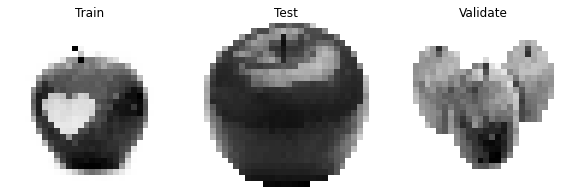

In [4]:
import matplotlib.pyplot as plt

# Function to display preprocessed images
def display_images(images, titles):
    plt.figure(figsize=(10, 10))
    for i in range(len(images)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Displaying the first preprocessed images from each set
display_images([first_train_image, first_test_image, first_validate_image], ["Train", "Test", "Validate"])


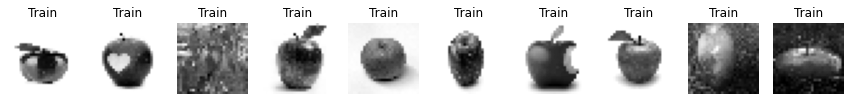

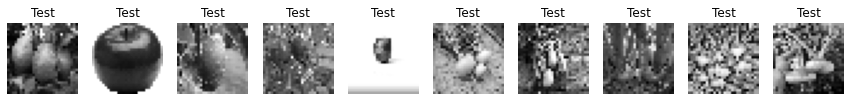

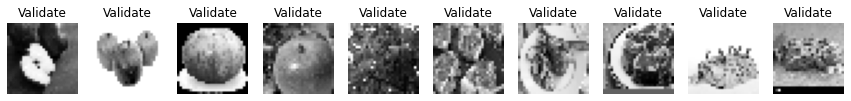

In [5]:
import matplotlib.pyplot as plt

# Function to display preprocessed images
def display_images(images, titles, num_images):
    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Displaying multiple preprocessed images from each set
num_images_to_display = 10  # Adjust this value to display more images

display_images(train_images, ["Train"]*num_images_to_display, num_images_to_display)
display_images(test_images, ["Test"]*num_images_to_display, num_images_to_display)
display_images(validate_images, ["Validate"]*num_images_to_display, num_images_to_display)


In [22]:
import os

# Function to save images to a directory
def save_images(images, output_directory):
    os.makedirs(output_directory, exist_ok=True)
    for i, image in enumerate(images):
        image_path = os.path.join(output_directory, f"image_{i}.jpg")
        cv2.imwrite(image_path, image)

# Output directories for augmented images
output_train_directory = "train_images"
output_test_directory = "test_images"
output_validate_directory = "validate_images"

# Save augmented images to directories
save_images(train_images, output_train_directory)
save_images(test_images, output_test_directory)
save_images(validate_images, output_validate_directory)